$$ \pi(x,y) \propto \exp(-V(x,y)),\quad V(x,y) = \sin(2+x)+\cos(1+y)$$

In [1]:
from lib import Model, SolveFokkerPlanck, plot_rho, sample, get_L2diff,downsample

In [2]:
import numpy as np

def V(x,y):
    return np.sin(2+x) + np.cos(1+y)
def F(x,y):
    Fx = -np.cos(2+x)
    Fy = np.sin(1+y)
    return [Fx,Fy]


def D(x,y):
    s = np.sin(2*x+y)
    c = np.cos(2*x+y)
    
    Da = 1 + s**2/4
    Db = (4-c)*s/4
    Dc = 1.25 - c 
    return [Da,Db,Dc]
def divD(x,y):
    s = np.sin(2*x+y)
    c = np.cos(2*x+y)
    s2 = np.sin(4*x+2*y)
    c2 = np.cos(4*x+2*y)
    
    Da_dx = s2/2
    Db_dx = 2*c-c2/2
    Db_dy = c-c2/4
    Dc_dy = s
    return [Da_dx+Db_dy,Db_dx+Dc_dy]




def D(x,y):
    s = np.sin(2*x+y)
    c = np.cos(2*x+y)
    
    Da = 1 + s**2/4
    Db = 0
    Dc = 1.25 - c 
    return [Da,Db,Dc]
def sqD(x,y):
    s = np.sin(2*x+y)
    c = np.cos(2*x+y)
    
    Da = np.sqrt(1 + s**2/4)
    Db = 0
    Dc = np.sqrt(1.25 - c)
    return [Da,Db,Dc]
def divD(x,y):
    s = np.sin(2*x+y)
    c = np.cos(2*x+y)
    s2 = np.sin(4*x+2*y)
    c2 = np.cos(4*x+2*y)
    
    Da_dx = s2/2
    Db_dx = 0
    Db_dy = 0
    Dc_dy = s
    return [Da_dx+Db_dy,Db_dx+Dc_dy]




In [3]:
mymodel = Model([V,F],[D,divD],[sqD,0])

In [12]:
NBINS = 250
dt = 2e-4
t_interval = 0.1 
T = 1.0

exact = SolveFokkerPlanck(mymodel, dt, NBINS, int(t_interval/dt) ,int(T/t_interval) , True)


[500, 1, 2.7614152431488037, 2.2737367544323206e-13]
[1000, 2, 5.342574119567871, 2.2737367544323206e-13]
[1500, 3, 7.885236978530884, -2.2737367544323206e-13]
[2000, 4, 10.427669048309326, 2.2737367544323206e-13]
[2500, 5, 13.056277990341187, 2.2737367544323206e-13]
[3000, 6, 15.63260006904602, 2.2737367544323206e-13]
[3500, 7, 18.205576181411743, 4.547473508864641e-13]
[4000, 8, 20.755577087402344, -2.2737367544323206e-13]
[4500, 9, 23.327237129211426, 0.0]
[5000, 10, 25.97031307220459, -2.2737367544323206e-13]


In [5]:
import matplotlib.pyplot as plt

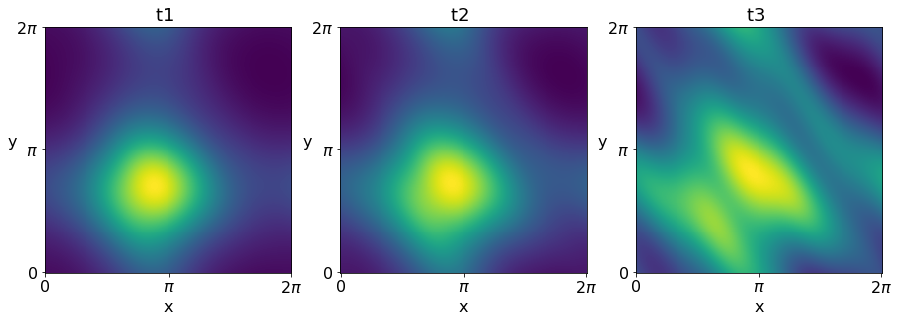

In [43]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_rho(exact,9,'t1 ')
plt.subplot(1,3,2)
plot_rho(exact,5,'t2 ')
plt.subplot(1,3,3)
plot_rho(exact,0,'t3 ')
plt.show()


In [51]:
Replicas = 10000000
NBINS = 250
dt = 0.5
T = 1.0

RV2 = sample(mymodel,'euler',Replicas,dt,NBINS,1,int(T/dt))

dt=dt/2 
RV3 = sample(mymodel,'euler',Replicas,dt,NBINS,2,int(T/dt/2))

[1, 1, 6.115331172943115]
[2, 2, 11.968042135238647]
[2, 1, 9.804386138916016]
[4, 2, 19.37276315689087]


In [52]:
get_L2diff( RV2, exact[4::5,:],10 ) / get_L2diff( RV3, exact[4::5],10 )

array([[1.91291967],
       [1.91869633]])

In [32]:
get_L2diff( RV2, exact[1::2,:],10 ) / get_L2diff( RV3, exact[1::2],10 )

array([[1.63038197],
       [1.80208804],
       [1.97386528],
       [2.00492479],
       [2.01163864]])

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_rho(downsample(RV,25),9,'t1 ')
plt.subplot(1,3,2)
plot_rho(downsample(RV2,25),1,'t2 ')
plt.subplot(1,3,3)
plot_rho(downsample(RV3,25),1,'t3 ')
plt.show()